In [1]:
(asdf:load-system :imago/jupyter)
(asdf:load-system :diff-boundary-corrfn)
(asdf:load-system :numpy-file-format)

T

T

T

In [2]:
;; Create a function which sums values of 4 random bell-shaped curves
(defparameter *field*
  (diff-boundary-corrfn/math:gaussian-field
    (diff-boundary-corrfn/math:random-gaussians 4)))

*FIELD*

In [3]:
(defparameter *field* (diff-boundary-corrfn/math:gaussian-field
                        (make-array 4
                                    :element-type 'diff-boundary-corrfn/math:gaussian
                                    :initial-contents
                                    (list (diff-boundary-corrfn/math:gaussian '(0.20129837572576403d0 0.6006667479358283d0) 0.12066764743962875d0)
                                          (diff-boundary-corrfn/math:gaussian '(0.5662323845338344d0 0.3946755555282704d0) 0.25931006943218965d0)
                                          (diff-boundary-corrfn/math:gaussian '(0.13559966531932555d0 -0.1893819684059702d0) 0.39385865916895546d0)
                                          (diff-boundary-corrfn/math:gaussian '(0.5867578805478955d0 -0.31106072334055224d0) 0.22561891199344378d0)))))

*FIELD*

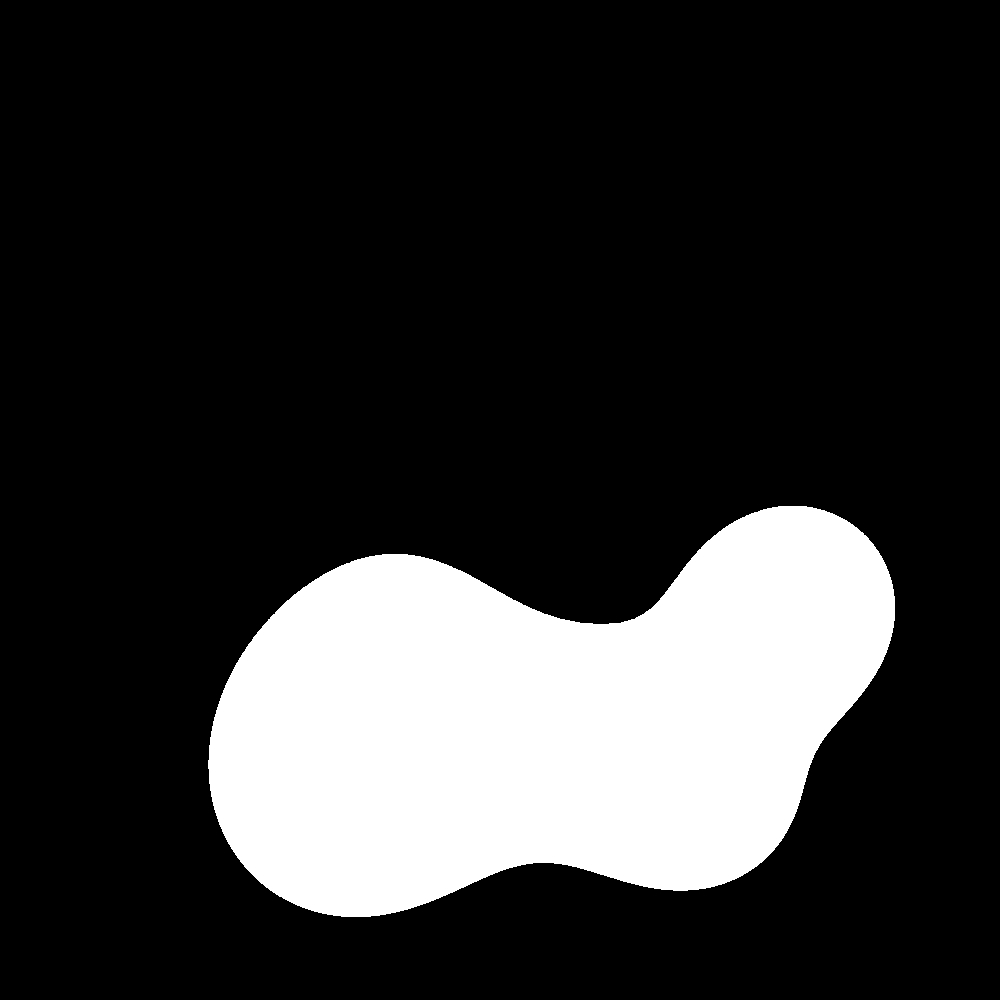

In [4]:
;; Evaluate it at points in uniform 3000x3000 grid and save an image
(let ((image (imago:make-binary-image-from-pixels
               (let ((descr (diff-boundary-corrfn:discretize-field 3000 *field*)))
                 (aops:vectorize* 'bit (descr) (if (> descr 3d0) 1 0))))))
  (imago:write-image image "/jails/julia/home/vasily/field.pbm")
  (imago-jupyter:show-image
    (imago:resize image 1000 1000)))

In [5]:
(time
  (defparameter *ss*
    (let ((cl-optim:*ε* 1d-4))
      (sb-int:with-float-traps-masked
        (:divide-by-zero)
        (loop for x from 0.1d0 to 0.5d0 by 0.005d0 collect
              (list (diff-boundary-corrfn:surface-surface *field* 3d0 (list x 0d0)) x 0d0))))))

*SS*

Evaluation took:
  94.798 seconds of real time
  94.800571 seconds of total run time (94.770104 user, 0.030467 system)
  [ Run times consist of 0.464 seconds GC time, and 94.337 seconds non-GC time. ]
  100.00% CPU
  360,228,694,544 processor cycles
  125,411,396,960 bytes consed
  


In [6]:
(time
  (defparameter *ss*
    (let ((cl-optim:*ε* 1d-4))
      (sb-int:with-float-traps-masked
        (:divide-by-zero)
        (diff-boundary-corrfn:surface-surface-at-dist *field* 3d0 3d-1 100)))))

*SS*

Evaluation took:
  121.033 seconds of real time
  121.039453 seconds of total run time (121.015855 user, 0.023598 system)
  [ Run times consist of 0.561 seconds GC time, and 120.479 seconds non-GC time. ]
  100.00% CPU
  459,919,771,174 processor cycles
  163,362,054,224 bytes consed
  


In [7]:
;; Save F_{ss} as a numpy array
(numpy-file-format:store-array
  (let ((ss (remove-if (alexandria:rcurry #'> 50) *ss* :key #'first)))
    (make-array (list (length ss) 3) :element-type 'double-float :initial-contents ss))
  "/jails/julia/home/vasily/ss-precise.npy")

NIL